### Import The Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Place the address of the chrome driver properly
driver=webdriver.Chrome('chromedriver')

In [3]:
driver.get('https://www.instagram.com/')
driver.maximize_window()
driver.implicitly_wait(10)

### Input The Credentials

In [4]:
username_box = driver.find_element_by_name('username')
username_box.send_keys('SAMPLE USERNAME')
password_box = driver.find_element_by_name('password')
password_box.send_keys('SAMPLE PASSWORD')

log_in = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div[1]/div/form/div[4]/button/div')
log_in.click()

driver.implicitly_wait(10)

In [5]:
#If the Pop up comes
if(driver.find_element_by_class_name('piCib')):
    Not_now = driver.find_element_by_class_name('HoLwm')
    Not_now.click()
    



In [6]:
#Search food 
driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys('food')


## Q1.1 Re-Scraping the instagram handles which will appear on typing "Food" in the search bar.

In [7]:
count=0
users=[]
# list of top 10 users will be stored in this list.
for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
    user_n=i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10:
        users.append(i.get_attribute('innerHTML'))
        count+=1

In [8]:
users

['foodgod',
 'foodnetwork',
 'foodnetworkkitchen',
 'foodinsider',
 'food52',
 'foodandwine',
 'buzzfeedfood',
 'healthyfoodadvice',
 'majorfoodgroup',
 'wholefoods']

In [9]:
# Clear the Search bar
driver.find_element_by_class_name('XTCLo ') 
clear_key = driver.find_element_by_class_name('coreSpriteSearchClear')
clear_key.click()

In [10]:
followers = []
for User in users:
    
    search_bar = driver.find_element_by_class_name('x3qfX')
    search_bar.send_keys(User)
    search_res = driver.find_element_by_class_name('yCE8d')
    search_res.click()
    driver.implicitly_wait(10)
    
    att = driver.find_elements_by_class_name('g47SY')
    followers_per_user = att[1].get_attribute('title')
    followers_per_user = int(followers_per_user.replace(',',''))
    followers.append(followers_per_user)
    print(User,' ',followers_per_user)
    time.sleep(5)


foodgod   3598065
foodnetwork   3598065
foodnetworkkitchen   10325580
foodinsider   440693
food52   2182063
foodandwine   2684594
buzzfeedfood   3380693
healthyfoodadvice   3757264
majorfoodgroup   3959690
wholefoods   32766


In [11]:
print(followers)
print(users)

[3598065, 3598065, 10325580, 440693, 2182063, 2684594, 3380693, 3757264, 3959690, 32766]
['foodgod', 'foodnetwork', 'foodnetworkkitchen', 'foodinsider', 'food52', 'foodandwine', 'buzzfeedfood', 'healthyfoodadvice', 'majorfoodgroup', 'wholefoods']


In [12]:
#Printing the Top 5
followers=np.array(followers, dtype='int')
users=np.array(users)
#sorted in ascending order
users=users[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]
#now printing top 5 
top5=[]
for x in range(5):
    print(users[x])
    top5.append(users[x])

foodnetworkkitchen
majorfoodgroup
healthyfoodadvice
foodnetwork
foodgod


## Q1.2. Finding the number of posts these handles have done in the previous 3 days.

In [13]:

posts = []

for User in top5:
    print(User)#, end=' ')
   
    #Give username to search bar
    
    search_bar = driver.find_element_by_class_name('x3qfX')
    search_bar.send_keys(User)
    search_res = driver.find_element_by_class_name('yCE8d')
    search_res.click()
    driver.implicitly_wait(10)
    time.sleep(10)

    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    count = 0
    while True:
        try:
            time_dur = driver.find_element_by_class_name('FH9sR.Nzb55')
            time_dur = time_dur.get_attribute('innerHTML')
        except:
            continue
        #print(time_dur)
        d_h = time_dur[-1]
        #if the last is 'y'(year) or 'w'(weeks) then break 
        if d_h  in ('y','w'):
            break
        if d_h == 'd':
            days = int(time_dur[:-1])
            if days > 3:
                cross_button = driver.find_element_by_xpath('//div[contains(@class,"                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG")]')
                cross_button.click()
                break
            else:
                count += 1
        else:
            count += 1
        #Shift Right
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        time.sleep(0.3)
    print(count)
    posts.append(count)


foodnetworkkitchen
19
majorfoodgroup
4
healthyfoodadvice
4
foodnetwork
46
foodgod
2


## Q1.3. Plotting Graph

<Figure size 432x288 with 0 Axes>

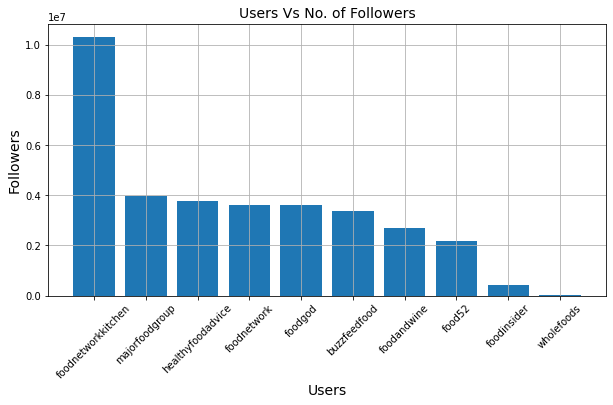

In [14]:
#plotting a graph between those 10 users and the number of followers
plt.subplots(0, 0)
plt.figure(figsize=(10, 5))
plt.bar(users, followers)
plt.xticks(rotation=45)
plt.title('Users Vs No. of Followers', size = 14)
plt.xlabel('Users', size = 14)
plt.ylabel('Followers', size = 14)
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

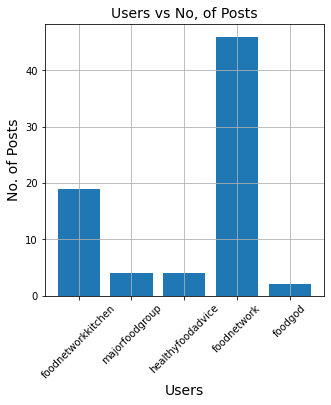

In [15]:
#graph between top 5 users and the number of posts
plt.subplots(0, 1)
plt.figure(figsize=(5, 5))
plt.bar(top5,posts)
plt.xticks(rotation=45)
plt.title('Users vs No, of Posts', size=14)
plt.xlabel('Users', size=14)
plt.ylabel('No. of Posts', size=14)
plt.grid()
plt.show()

##  Q2.1. Opening the 5 handles  obtained in the last question, and scraping the content of the first 10 posts of each handle.

In [16]:
total_words = []
hashtags = []

In [17]:

for User in top5:
    search_bar = driver.find_element_by_class_name('x3qfX')
    search_bar.send_keys(User)
    search_res = driver.find_element_by_class_name('yCE8d')
    search_res.click()
    driver.implicitly_wait(10)
    time.sleep(10)

    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    count = 0
    
    i = 1
    
    while i <= 10:
        i += 1
        #If it is taking time in loading
        try:
            total_words.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
            for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
                hashtags.append(hashes.get_attribute('innerHTML'))
        except:
            #Shift Right
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
            time.sleep(3)
        driver.back()
        time.sleep(1)
       
        
        #Shift Right
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        time.sleep(3)
    
    cross_button = driver.find_element_by_xpath('//div[contains(@class,"                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG")]')
    cross_button.click()
   

# Cleaning the data

In [18]:
print(total_words[0])
print(hashtags[0])

Join in on our #WeCookTogether weekend on the #FoodNetworkKitchen app! Cook along LIVE with some of your favorite Food Network chefs starting at 12|11c this Saturday and Sunday, and ask questions as you cook along. Head to your #FoodNetworkKitchen app to see the full lineup and set your reminders! #WeCookTogether
#WeCookTogether


In [19]:
#here in the question i am considering that "words" mean hashtags. because there will be no sense of getting the frequency of all the words in the content.
#firstly i will convert the "hashtags" list to a numpy array
hashtags=np.array(hashtags)
hash_tags=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
for i in hashtags:
    if not i[0]=='@' and i!='':
        hash_tags.append(i)
#now "hash_tags" is the actual array which we actually require so we will keep it
hash_tags

['#WeCookTogether',
 '#FoodNetworkKitchen',
 '#FoodNetworkKitchen',
 '#WeCookTogether',
 '#FoodNetworkKitchen',
 '#FoodNetworkKitchen',
 '#FoodNetworkKitchen',
 '#ed',
 '#FoodNetworkKitchen',
 '#WeCookTogether',
 '#FoodNetworkKitchen',
 '#WeCookTogether',
 '#FoodNetworkKitchen',
 '#FoodNetworkKitchen',
 '#FoodNetworkKitchen',
 '#Sweepstakes',
 '#foodnetworkkitchen',
 '#amazonfirestick',
 '#symondinners',
 '#FoodNetworkKitchen',
 '#FoodNetworkKitchen',
 '#WeCookTogether',
 '#majorfoodgroup',
 '#eeeeeats',
 '#newforkcity',
 '#forkyeah',
 '#eatmunchies',
 '#zagat',
 '#feastagram',
 '#eater',
 '#love',
 '#instagood',
 '#eaterny',
 '#food',
 '#igdaily',
 '#grubstreet',
 '#photooftheday',
 '#feedfeed',
 '#foodandwine',
 '#yelpeatsnyc',
 '#instafood',
 '#nyc',
 '#foodbeast',
 '#mfgthegrill',
 '#primerib',
 '#thegrill',
 '#majorfoodgroup',
 '#eeeeeats',
 '#newforkcity',
 '#forkyeah',
 '#eatmunchies',
 '#zagat',
 '#feastagram',
 '#eater',
 '#love',
 '#instagood',
 '#eaterny',
 '#food',
 '#igdai

## Q2.2. Preparing a list of all words used in all the scraped posts and calculating the frequency of each word.

In [20]:
dic=dict()#this will store the frequencies of all the hashtags
for i in hash_tags:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
dic
#this is our dictionary which contains all the frequencies of the hashtags

{'#WeCookTogether': 8,
 '#FoodNetworkKitchen': 13,
 '#ed': 1,
 '#Sweepstakes': 1,
 '#foodnetworkkitchen': 1,
 '#amazonfirestick': 1,
 '#symondinners': 1,
 '#majorfoodgroup': 9,
 '#eeeeeats': 9,
 '#newforkcity': 9,
 '#forkyeah': 9,
 '#eatmunchies': 9,
 '#zagat': 9,
 '#feastagram': 9,
 '#eater': 9,
 '#love': 9,
 '#instagood': 9,
 '#eaterny': 9,
 '#food': 11,
 '#igdaily': 9,
 '#grubstreet': 9,
 '#photooftheday': 9,
 '#feedfeed': 9,
 '#foodandwine': 9,
 '#yelpeatsnyc': 9,
 '#instafood': 9,
 '#nyc': 10,
 '#foodbeast': 9,
 '#mfgthegrill': 1,
 '#primerib': 1,
 '#thegrill': 1,
 '#mfgcarbone': 8,
 '#carrotcake': 1,
 '#carbone': 7,
 '#herpes': 1,
 '#hiv': 1,
 '#cancer': 1,
 '#diabetes': 1,
 '#Stroke': 1,
 '#lasagna': 1,
 '#caviar': 6,
 '#doordash': 3,
 '#spicyrigatoni': 1,
 '#vealparm': 1,
 '#rainbowcookies': 1,
 '#cavir': 1,
 '#healthylife': 1,
 '#healthy': 3,
 '#happy': 1,
 '#healing': 1,
 '#holistic': 1,
 '#naturalhealing': 1,
 '#natural': 1,
 '#herbalmedicine': 1,
 '#alkalinefood': 1,
 '#hea

## Q2.3. Creating a csv file with two columns : the word and its frequency

In [21]:
hash_word=np.array([i[1:] for i in dic.keys()])
frequency=np.array([i for i in dic.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Hashtag_Frequencies.csv')
#hence the file is saved in the working directory

## Q2.4. Finding the hashtags that were most popular among these bloggers

In [22]:
hash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print(hash_word[i], ":", frequency[i])

FoodNetworkKitchen : 13
food : 11
nyc : 10
eatmunchies : 9
grubstreet : 9
igdaily : 9
eaterny : 9
instagood : 9
love : 9
eater : 9
feastagram : 9
zagat : 9
forkyeah : 9
feedfeed : 9
newforkcity : 9
eeeeeats : 9
majorfoodgroup : 9
foodandwine : 9
yelpeatsnyc : 9
instafood : 9
foodbeast : 9
photooftheday : 9
mfgcarbone : 8
WeCookTogether : 8
carbone : 7
caviar : 6
foodgod : 6
staystrong : 4
stayhome : 3
WeCook : 3
doordash : 3
healthy : 3
yummy : 2
diy : 2
giveawaytime : 2
giveback : 2
holistic : 1
naturalhealing : 1
natural : 1
healing : 1
herbalmedicine : 1
alkalinefood : 1
whatsonmyplate : 1
healer : 1
alkalineliving : 1
breakfast : 1
nature : 1
organic : 1
vegan : 1
alkalinediet : 1
staysexy : 1
eggs : 1
egg : 1
minerals : 1
cancer : 1
happy : 1
healthylife : 1
ed : 1
Sweepstakes : 1
foodnetworkkitchen : 1
amazonfirestick : 1
symondinners : 1
mfgthegrill : 1
primerib : 1
thegrill : 1
carrotcake : 1
herpes : 1
hiv : 1
tasty : 1
diabetes : 1
Stroke : 1
lasagna : 1
spicyrigatoni : 1
vea

## Q2.5. Plotting a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

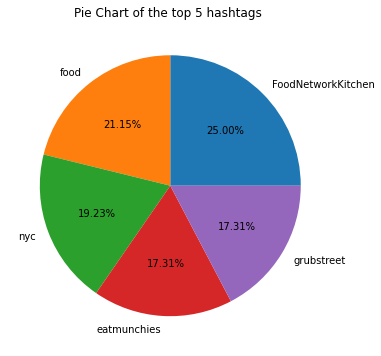

In [23]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(6, 6))
plt.pie(y, labels=x, autopct='%.2f%%')
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

## Q3.1. Finding out the likes of the top 10 posts of the 5 handles obtained earlier.

In [24]:
no_of_likes = []
followers_list = []

In [25]:
no_of_likes = []
for Users in top5:
    print(Users)
    likes_user = []
    search_bar = driver.find_element_by_class_name('x3qfX')
    search_bar.send_keys(Users)
    search_res = driver.find_element_by_class_name('yCE8d')
    search_res.click()
    driver.implicitly_wait(8)
    time.sleep(8)

    followers = driver.find_elements_by_class_name('g47SY ')[1]
    print('followers',followers.get_attribute('title'))
    followers_list.append(followers.get_attribute('title'))
    
    
    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    
    
    i = 1
    
    while i <= 10:
        print(i)
        i += 1
        #If it is taking time in loading
        try:
            
            driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/span/span').click()
            time.sleep(1)
            likes =  driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/div[4]/span')
            print(likes.get_attribute('innerHTML'))
            react = likes.get_attribute('innerHTML')
            #react = react.replce(',','')
            #react = int(react)
            likes_user.append(react)
            #driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/span/span').click()
            driver.find_element_by_xpath('//div[contains(@class,"QhbhU")]').click()
        except:
            likes =  driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span')
            print(likes.get_attribute('innerHTML'))
            react = likes.get_attribute('innerHTML')
            #react = react.replce(',','')
            
            likes_user.append(react)
 
            
        
        time.sleep(1)
       
        
        #Shift Right
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        
        time.sleep(1)
    
    cross_button = driver.find_element_by_xpath('//div[contains(@class,"                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG")]')
    cross_button.click()
    
    no_of_likes.append(likes_user)

foodnetworkkitchen
followers 440,693
1
183
2
676
3
1,716
4
1,124
5
930
6
452
7
845
8
482
9
722
10
1,119
majorfoodgroup
followers 32,766
1
1,019
2
529
3
579
4
1,857
5
1,024
6
371
7
929
8
121
9
982
10
1,073
healthyfoodadvice
followers 3,959,690
1
11,110
2
14,225
3
14,481
4
19,891
5
14,042
6
14,533
7
11,229
8
9,632
9
8,636
10
15,991
foodnetwork
followers 10,325,580
1
12,529
2
1,765
3
10,168
4
3,349
5
14,798
6
15,560
7
9,025
8
5,720
9
8,133
10
12,309
foodgod
followers 3,598,065
1
26,538
2
55,761
3
7,939
4
12,165
5
6,339
6
57,435
7
54,528
8
14,708
9
28,129
10
16,005


In [26]:
likes_store = []
for col in no_of_likes:
    total = 0
    for reacts in col:
        reacts = reacts.replace(',','')
        reacts = int(reacts)
        total += reacts
    print(total)
    likes_store.append(total)

8249
8484
133770
93356
279547


In [27]:
top5=np.array(top5)
top5

array(['foodnetworkkitchen', 'majorfoodgroup', 'healthyfoodadvice',
       'foodnetwork', 'foodgod'], dtype='<U18')

In [28]:
likes_store = np.array(    likes_store)
#likes on the top 10 posts for those 5 users
likes_store

array([  8249,   8484, 133770,  93356, 279547])

In [29]:
followers_list2 = []
for ele in followers_list:
    f = int(ele.replace(',',''))
    followers_list2.append(f)

followers_list2 = np.array(followers_list2)
followers_list2

array([  440693,    32766,  3959690, 10325580,  3598065])

## Q3.2. Calculating the average likes for a handle.

In [30]:
average_likes=likes_store/10
average_likes
for i in range(5):
    print(top5[i],' : ',average_likes[i])

foodnetworkkitchen  :  824.9
majorfoodgroup  :  848.4
healthyfoodadvice  :  13377.0
foodnetwork  :  9335.6
foodgod  :  27954.7


## Q3.3. Dividing the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [34]:
ratio=followers_list2/average_likes
for i in range(5):
    print(top5[i],' : ',round(ratio[i],4))

foodnetworkkitchen  :  534.2381
majorfoodgroup  :  38.6209
healthyfoodadvice  :  296.0073
foodnetwork  :  1106.0435
foodgod  :  128.7106


## Q3.4.Create a bar graph to depict the above obtained information.

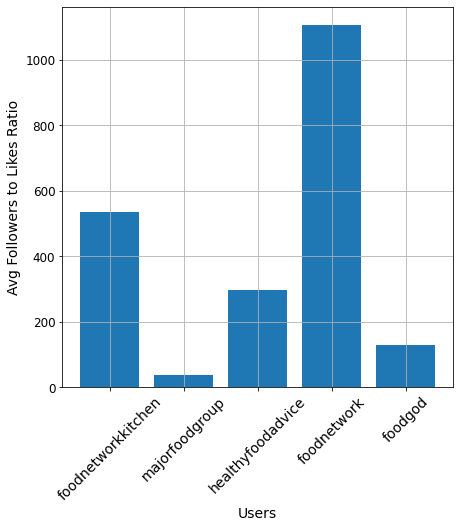

In [39]:
#plotting the graph between average followers to the likes ratio and users.
plt.figure(figsize=(7,7))
plt.bar(top5, ratio)
plt.xticks(rotation=45, size=14)
plt.xlabel('Users', size=14)
plt.ylabel('Avg Followers to Likes Ratio', size=14)
plt.yticks(size=12)
plt.grid()
plt.show()